<a href="https://colab.research.google.com/github/JuhiAmeta/Kaggle-Bi-LSTM/blob/main/kaggle_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


# New section

In [2]:
import pandas as pd
import re
import nltk
import string
import numpy as np
pd.options.mode.chained_assignment = None

df = pd.read_csv(r"../content/train.csv", encoding ="latin-1")

df["text"] = df["text"].astype(str)

df['final'] = df['text'] 
df = df[['final','target']]

df.head()


,final,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df['final'].isnull().sum()

0

In [4]:
df['target'].isnull().sum()

0

In [5]:
df["text_lower"] = df["final"].str.lower()
df.head()

,final,target,text_lower
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


In [6]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df["text_wo_punct"].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    just got sent this photo from ruby alaska as s...
Name: text_wo_punct, dtype: object

In [7]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [8]:
"""custom function to remove the stopwords"""
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df.head()

,final,target,text_lower,text_wo_punct,text_wo_stop
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...


In [9]:
df['final_text'] = df['text_wo_stop']
df.head()

,final,target,text_lower,text_wo_punct,text_wo_stop,final_text
0,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...,our deeds are the reason of this earthquake ma...,deeds reason earthquake may allah forgive us,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...,residents asked shelter place notified officer...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...,just got sent this photo from ruby alaska as s...,got sent photo ruby alaska smoke wildfires pou...,got sent photo ruby alaska smoke wildfires pou...


In [10]:
X = df['final_text']
X

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610    m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: final_text, Length: 7613, dtype: object

In [11]:
X.shape

(7613,)

In [12]:
y=df["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [13]:
y.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(6090,)
(1523,)
(6090,)
(1523,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


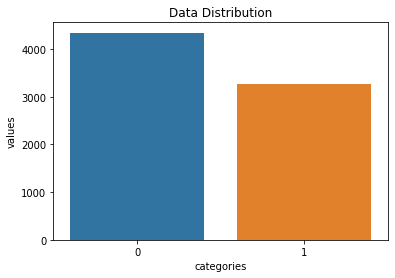

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df.target)
plt.title('Data Distribution')
plt.xlabel('categories')
plt.ylabel('values')
plt.show()

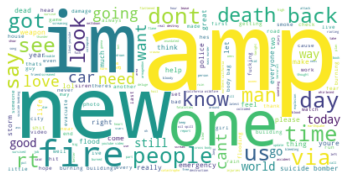

In [16]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white')
wc.generate(' '.join(df['final_text']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
from keras.preprocessing.text import Tokenizer                    
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
x_train

5418    realized maybe normal sit front uber driver pa...
2209    wa smiles july deluge west australian httpstco...
3925    hellotybeeren cue flood people ironically calling
988     fuckyeahcarey bornverified drake killing dude ...
7044    massive typhoon heads toward taiwan httptcona2...
                              ...                        
5970          kamkasteiiano bluntedjayt fucking screaming
1611    liked youtube video httptcobm0qec7pja eminem f...
4001    download itunes httptcoocojppnrh1 floods glory...
4008    nearly 50 thousand people affected floods para...
6831    hollywood movie trapped miners released chile ...
Name: final_text, Length: 6090, dtype: object

In [18]:


x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
# Adding 1 because of  reserved 0 index
vocab_size = len(tokenizer.word_index) + 1                          

print(vocab_size)


19297


In [19]:
maxlen = 100

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [20]:
x_train

array([[ 1912,   634,  2267, ...,     0,     0,     0],
       [ 1461,  3724,  1913, ...,     0,     0,     0],
       [ 5732,  2806,   109, ...,     0,     0,     0],
       ...,
       [  734,  1743, 19289, ...,     0,     0,     0],
       [  679,   618,  2391, ...,     0,     0,     0],
       [  624,   183,   246, ...,     0,     0,     0]], dtype=int32)

In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
%cd /content/drive/My Drive/Thinkbridge-Frontline/

/content/drive/My Drive/Thinkbridge-Frontline


In [27]:
from numpy import asarray

# load the whole embedding into memory
embeddings_index = dict()
f = open('/content/drive/MyDrive/glove.6B.100d.txt',encoding="utf8")
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [29]:
from numpy import zeros

# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [31]:
##### Bi-LSTM Model

from keras.models import Sequential
from keras import layers


embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,weights=[embedding_matrix],input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(150,activation='relu',return_sequences=True)))
model.add(layers.Dropout(0.5))
#model.add(layers.Bidirectional(layers.LSTM(50,activation='relu',return_sequences=True)))
#model.add(layers.Dropout(0.1))
#model.add(layers.Dense(100))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1929700   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 300)         301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 300)          0         
                                                                 
 dense (Dense)               (None, 100, 1)            301       
                                                                 
Total params: 2,231,201
Trainable params: 2,231,201
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True)
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    batch_size=512,callbacks=[callback])

Epoch 1/20
12/12 [==============================] - 38s 3s/step - loss: 0.6770 - accuracy: 0.5813 - val_loss: 0.6528 - val_accuracy: 0.6341
Epoch 2/20
12/12 [==============================] - 35s 3s/step - loss: 0.6824 - accuracy: 0.6460 - val_loss: 0.6153 - val_accuracy: 0.6766
Epoch 3/20
12/12 [==============================] - 34s 3s/step - loss: 0.6293 - accuracy: 0.6585 - val_loss: 0.6298 - val_accuracy: 0.6482
Epoch 4/20
12/12 [==============================] - 34s 3s/step - loss: 0.6287 - accuracy: 0.6463 - val_loss: 0.5945 - val_accuracy: 0.7000
Epoch 5/20
12/12 [==============================] - 34s 3s/step - loss: 0.5961 - accuracy: 0.7199 - val_loss: 0.5823 - val_accuracy: 0.6853
Epoch 6/20
12/12 [==============================] - 34s 3s/step - loss: 0.5678 - accuracy: 0.7457 - val_loss: 0.5613 - val_accuracy: 0.8025
Epoch 7/20
12/12 [==============================] - 34s 3s/step - loss: 0.5304 - accuracy: 0.7490 - val_loss: 0.4854 - val_accuracy: 0.7888
Epoch 8/20
12/12 [==

In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


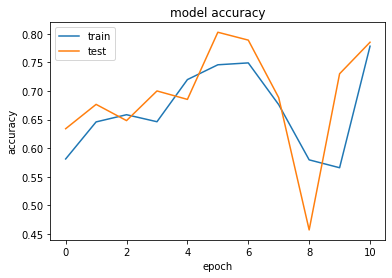

In [34]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

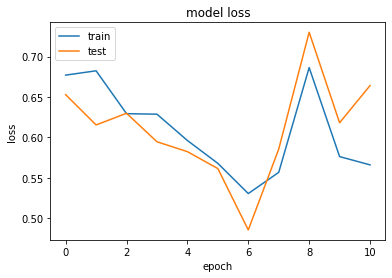

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5).astype(int)
y_pred

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]])

In [37]:
y_test

5554    0
4384    0
5755    0
2839    1
1588    0
       ..
4514    1
2041    0
5845    0
6386    1
366     0
Name: target, Length: 1523, dtype: int64

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

48/48 - 3s - loss: 0.4854 - accuracy: 0.7888 - 3s/epoch - 57ms/step
Model accuracy:  0.7887920141220093
